In [68]:
import sys
sys.path.append('/pf/a/a270046/hierarchy/pyfesom_natcommun')

import matplotlib
#matplotlib.use('Agg') #-- use in batch mode
#matplotlib.use('TkAgg')
from netCDF4 import Dataset, MFDataset
#import pyfesom as pf
import pyfesom2 as pf2
import numpy as np
#from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from matplotlib import cm
#from colorbars import cmap_correlations256
import seawater as sw
import xarray as xr
import pandas as pd
import cmocean
import numpy.matlib
import matplotlib.colors as mcol

In [2]:
%matplotlib inline
%load_ext ipycache

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


Copied from Ollie: /work/ollie/jstreffi/runtime/awicm-3.1/TCO8/outdata/fesom/

In [3]:
ls /work/ab0995/a270046/AWICM3-SO-checks/TCO8/

a_ice.fesom.2000.nc          TCO8_evap.fesom.2000.nc
a_ice.fesom.2001.nc          TCO8_evap.fesom.2001.nc
a_ice.fesom.2002.nc          TCO8_evap.fesom.2002.nc
a_ice.fesom.2003.nc          TCO8_evap.fesom.2003.nc
a_ice.fesom.2004.nc          TCO8_evap.fesom.2004.nc
a_ice.fesom.2005.nc          TCO8_evap.fesom.2005.nc
a_ice.fesom.2006.nc          TCO8_evap.fesom.2006.nc
a_ice.fesom.2007.nc          TCO8_evap.fesom.2007.nc
a_ice.fesom.2008.nc          TCO8_evap.fesom.2008.nc
a_ice.fesom.2009.nc          TCO8_evap.fesom.2009.nc
a_ice.fesom.2010.nc          TCO8_evap.fesom.2010.nc
a_ice.fesom.2011.nc          TCO8_evap.fesom.2011.nc
a_ice.fesom.2012.nc          TCO8_evap.fesom.2012.nc
a_ice.fesom.2013.nc          TCO8_evap.fesom.2013.nc
a_ice.fesom.2014.nc          TCO8_evap.fesom.2014.nc
a_ice.fesom.2015.nc          TCO8_evap.fesom.2015.nc
a_ice.fesom.2016.nc          TCO8_evap.fesom.2016.nc
a_ice.fesom.2017.nc          TCO8_evap.fesom.2017.nc
a_ice.fesom.2018.nc          TCO8_evap.fesom.2

In [5]:
# copied /work/ollie/projects/clidyn/FESOM2/meshes/core2/ -> core2 to use same grid
# meshpath  ='/work/ab0995/a270046/AWICM3-SO-checks/core2_meanz' # COREII at DKRZ
meshpath  ='/work/ab0995/a270046/AWICM3-SO-checks/core2' # COREII at DKRZ
outpath = '/work/ab0995/a270046/AWICM3-SO-checks/TCO8/'
mesh = pf2.load_mesh(meshpath, usepickle=True)
mesh.path = '/work/ab0995/a270046/AWICM3-SO-checks/core2'

/work/ab0995/a270046/AWICM3-SO-checks/core2/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ab0995/a270046/AWICM3-SO-checks/core2/pickle_mesh_py3_fesom2


In [7]:
# get data at level
depth=0. #-- surface value
level_data = pf2.get_data(outpath, 'atmoce_x', years=[2019], mesh=mesh, depth=depth, how='ori')
level_data_2 = pf2.get_data(outpath, 'sst', years=[2019], mesh=mesh, depth=depth, how='ori')

Model depth: 0.0
Model depth: 0.0


In [8]:
level_data.shape

(12, 126858)

[<GeoAxesSubplot:>]

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


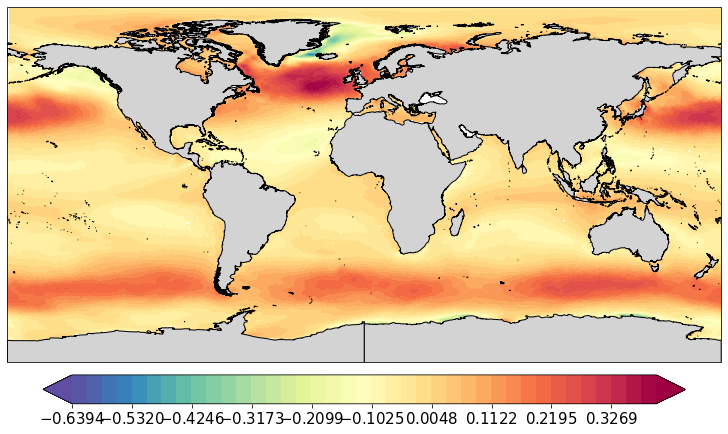

In [9]:
pf2.plot(mesh, level_data[1,:], distances_path=None)

[<GeoAxesSubplot:>]

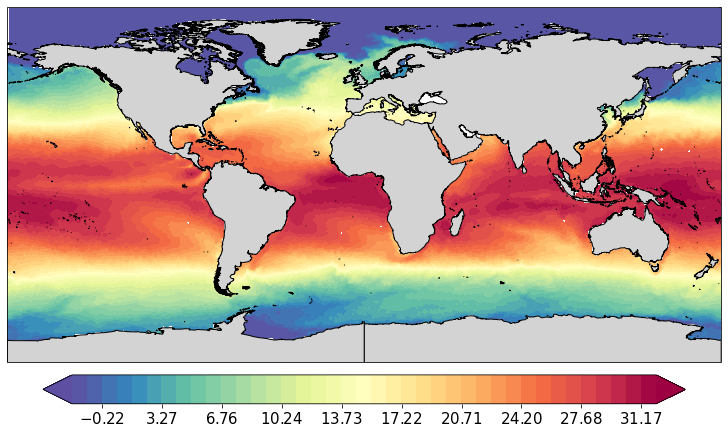

In [10]:
pf2.plot(mesh, level_data_2[1,:])

In [11]:
# check how this looks in the uncoupled spinup

In [18]:
#load spinup data
depth=0
spinup_sst = pf2.get_data('/work/ab0995/a270046/AWICM3-SO-checks/spi1/', 'sst', years=[1999], mesh=mesh, depth=depth, how='ori')
depth=0
spinup_stressx = pf2.get_data('/work/ab0995/a270046/AWICM3-SO-checks/spi1/', 'atmoce_x', years=[1999], mesh=mesh, depth=depth, how='ori')

Model depth: 0.0
Model depth: 0.0


In [17]:
# load coupled data
coupled_sst = pf2.get_data('/work/ab0995/a270046/AWICM3-SO-checks/TCO8/', 'sst', years=[2019], mesh=mesh, depth=depth, how='ori')
coupled_stressx = pf2.get_data('/work/ab0995/a270046/AWICM3-SO-checks/TCO8/', 'atmoce_x', years=[2019], mesh=mesh, depth=depth, how='ori')

Model depth: 0.0
Model depth: 0.0


array([<GeoAxesSubplot:title={'center':'JFMA-mean (last y of spinup, 1999)'}>,
       <GeoAxesSubplot:title={'center':'JFMA-mean (coupled year 2019)'}>],
      dtype=object)

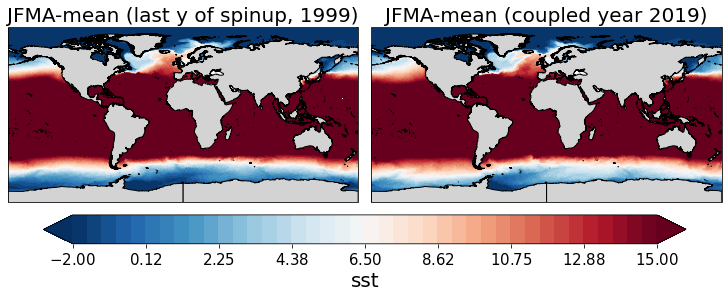

In [14]:
pf2.plot(mesh, [spinup_sst[0:4,:].mean(axis=0), coupled_sst[0:4,:].mean(axis=0)], units='sst', titles=['JFMA-mean (last y of spinup, 1999)','JFMA-mean (coupled year 2019)'], levels=[-2.,15.,41], cmap=cm.RdBu_r, rowscol=(1,2))

array([<GeoAxesSubplot:title={'center':'JFMA-mean (last y of spinup, 1999)'}>,
       <GeoAxesSubplot:title={'center':'JFMA-mean (1st coupled year 1990)'}>],
      dtype=object)

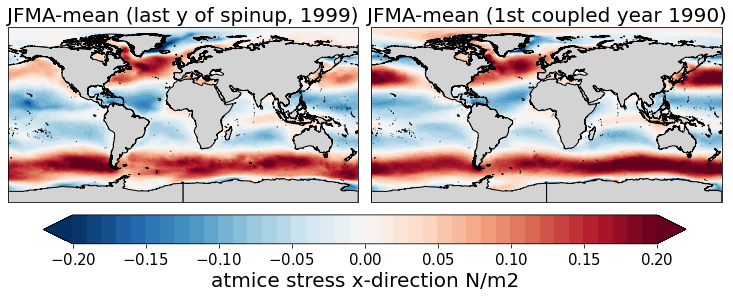

In [15]:
pf2.plot(mesh, [spinup_stressx[0:4,:].mean(axis=0), coupled_stressx[0:4,:].mean(axis=0)], units='atmice stress x-direction N/m2', titles=['JFMA-mean (last y of spinup, 1999)','JFMA-mean (1st coupled year 1990)'], levels=[-0.2,0.2,41], cmap=cm.RdBu_r, rowscol=(1,2))

array([<GeoAxesSubplot:title={'center':'JAS-mean (last y of spinup, 1999)'}>,
       <GeoAxesSubplot:title={'center':'JAS-mean (1st coupled year 1990)'}>],
      dtype=object)

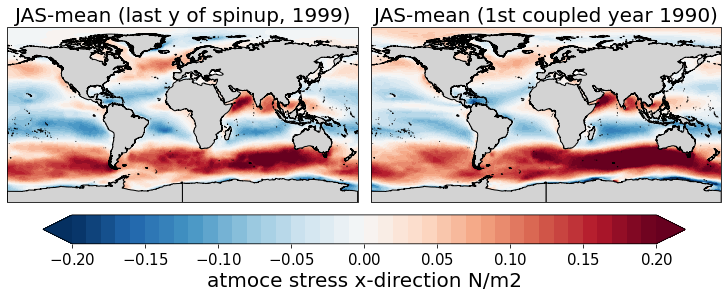

In [16]:
pf2.plot(mesh, [spinup_stressx[6:9,:].mean(axis=0), coupled_stressx[6:9,:].mean(axis=0)], units='atmoce stress x-direction N/m2', titles=['JAS-mean (last y of spinup, 1999)','JAS-mean (1st coupled year 1990)'], levels=[-0.2,0.2,41], cmap=cm.RdBu_r, rowscol=(1,2))

### look at sections now

In [21]:
np.linspace(-80.,0.,161)

array([-80. , -79.5, -79. , -78.5, -78. , -77.5, -77. , -76.5, -76. ,
       -75.5, -75. , -74.5, -74. , -73.5, -73. , -72.5, -72. , -71.5,
       -71. , -70.5, -70. , -69.5, -69. , -68.5, -68. , -67.5, -67. ,
       -66.5, -66. , -65.5, -65. , -64.5, -64. , -63.5, -63. , -62.5,
       -62. , -61.5, -61. , -60.5, -60. , -59.5, -59. , -58.5, -58. ,
       -57.5, -57. , -56.5, -56. , -55.5, -55. , -54.5, -54. , -53.5,
       -53. , -52.5, -52. , -51.5, -51. , -50.5, -50. , -49.5, -49. ,
       -48.5, -48. , -47.5, -47. , -46.5, -46. , -45.5, -45. , -44.5,
       -44. , -43.5, -43. , -42.5, -42. , -41.5, -41. , -40.5, -40. ,
       -39.5, -39. , -38.5, -38. , -37.5, -37. , -36.5, -36. , -35.5,
       -35. , -34.5, -34. , -33.5, -33. , -32.5, -32. , -31.5, -31. ,
       -30.5, -30. , -29.5, -29. , -28.5, -28. , -27.5, -27. , -26.5,
       -26. , -25.5, -25. , -24.5, -24. , -23.5, -23. , -22.5, -22. ,
       -21.5, -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. , -17.5,
       -17. , -16.5,

In [22]:
sec=np.array([-30.*np.ones(161),np.linspace(-80.,0.,161)])
#sec=pf2.transect_get_lonlat(lon_start=-30., lat_start=-80., lon_end=-30., lat_end=-40., npoints=79)

In [23]:
sec[1, :]

array([-80. , -79.5, -79. , -78.5, -78. , -77.5, -77. , -76.5, -76. ,
       -75.5, -75. , -74.5, -74. , -73.5, -73. , -72.5, -72. , -71.5,
       -71. , -70.5, -70. , -69.5, -69. , -68.5, -68. , -67.5, -67. ,
       -66.5, -66. , -65.5, -65. , -64.5, -64. , -63.5, -63. , -62.5,
       -62. , -61.5, -61. , -60.5, -60. , -59.5, -59. , -58.5, -58. ,
       -57.5, -57. , -56.5, -56. , -55.5, -55. , -54.5, -54. , -53.5,
       -53. , -52.5, -52. , -51.5, -51. , -50.5, -50. , -49.5, -49. ,
       -48.5, -48. , -47.5, -47. , -46.5, -46. , -45.5, -45. , -44.5,
       -44. , -43.5, -43. , -42.5, -42. , -41.5, -41. , -40.5, -40. ,
       -39.5, -39. , -38.5, -38. , -37.5, -37. , -36.5, -36. , -35.5,
       -35. , -34.5, -34. , -33.5, -33. , -32.5, -32. , -31.5, -31. ,
       -30.5, -30. , -29.5, -29. , -28.5, -28. , -27.5, -27. , -26.5,
       -26. , -25.5, -25. , -24.5, -24. , -23.5, -23. , -22.5, -22. ,
       -21.5, -21. , -20.5, -20. , -19.5, -19. , -18.5, -18. , -17.5,
       -17. , -16.5,

In [24]:
!ls /work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1*

/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2000.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2001.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2002.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2003.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2004.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2005.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2006.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2007.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2008.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2009.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2010.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2011.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2012.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2013.nc
/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.201

In [25]:
coupled_temp_20 = pf2.get_data('/work/ab0995/a270046/AWICM3-SO-checks/TCO8/', 'temp', years=np.arange(2000,2019+1,1), mesh=mesh, how='mean')
coupled_salt_20 = pf2.get_data('/work/ab0995/a270046/AWICM3-SO-checks/TCO8/', 'salt', years=np.arange(2000,2019+1,1), mesh=mesh, how='mean')

Depth is None, 3d field will be returned
Depth is None, 3d field will be returned


In [26]:
!ncdump -h /work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.2019.nc

netcdf TCO8_MLD1.fesom.2019 {
dimensions:
	nod2 = 126858 ;
	time = UNLIMITED ; // (12 currently)
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:standard_name = "time" ;
		time:units = "seconds since 2019-01-01 0:0:0" ;
		time:axis = "T" ;
		time:stored_direction = "increasing" ;
	float MLD1(time, nod2) ;
		MLD1:description = "Mixed Layer Depth" ;
		MLD1:long_name = "Mixed Layer Depth" ;
		MLD1:units = "m" ;

// global attributes:
		:FESOM_model = "FESOM2" ;
		:FESOM_website = "fesom.de" ;
		:FESOM_git_SHA = "c152a83" ;
		:FESOM_MeshPath = "/work/ollie/projects/clidyn/FESOM2/meshes/core2//" ;
		:FESOM_mesh_representative_checksum = "96ef52281f7e327b221950bcd07cc1d8" ;
		:FESOM_ClimateDataPath = "/work/ollie/jstreffi/input/fesom2/hydrography/" ;
		:FESOM_which_ALE = "zstar" ;
		:FESOM_mix_scheme = "KPP" ;
		:FESOM_tra_adv_hor = "MFCT" ;
		:FESOM_tra_adv_ver = "QR4C" ;
		:FESOM_tra_adv_lim = "FCT" ;
		:FESOM_use_partial_cell = -1 ;
		:FESOM_force_rotation = -1 ;
		:FES

In [27]:
dist,secT=pf2.get_transect(data=coupled_temp_20, mesh=mesh, lonlat=sec)
dist,secS=pf2.get_transect(data=coupled_salt_20, mesh=mesh, lonlat=sec)

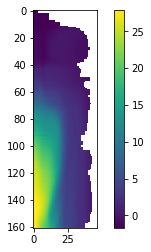

In [28]:
plt.imshow(secT)
plt.colorbar()
plt.show()

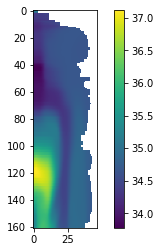

In [29]:
plt.imshow(secS)
plt.colorbar()
plt.show()

In [30]:
np.shape(secT), np.shape(dist)

((161, 47), (161,))

In [31]:
# initialize additional variables
secTinsitu=np.copy(secT)
sec_sigma2=np.zeros_like(secT)

# for every layer (0 ... 32):
for ilevel in np.arange(0,np.shape(mesh.zlev)[0]-1):
    # FESOM PART
    # calculates temperature from potential temperature at the reference pressure PR and in situ pressure P
    secTinsitu[:,ilevel]=sw.eos80.temp(secS[:,ilevel], secT[:,ilevel], mesh.zlev[ilevel], pr=0)
    
    # density of Sea Water using UNESCO 1983 (EOS 80) polynomial
    sec_sigma2[:,ilevel]=sw.eos80.pden(secS[:,ilevel], secTinsitu[:,ilevel], mesh.zlev[ilevel], pr=2000.)-1000.

In [32]:
YY,DEPTH=np.meshgrid(sec[1,:], mesh.zlev[:-1])

In [33]:
np.shape(secT), np.shape(DEPTH)

((161, 47), (47, 161))

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'zlev'
  This is separate from the ipykernel package so we can avoid doing imports until


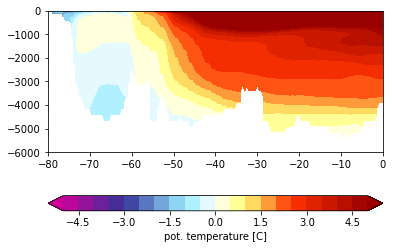

In [34]:
# plot the T section
levels = np.arange(-5, 5.+0.5, 0.5) # -5 to 5 degrees
CS = plt.contourf(YY, DEPTH, secT.T, levels = levels, cmap=cmap_correlations256, extend='both', zlev=0); # cm.seismic
cbar=plt.colorbar(CS, orientation = 'horizontal', pad=0.2, label='pot. temperature [C]')
plt.show()

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'zlev'
  This is separate from the ipykernel package so we can avoid doing imports until


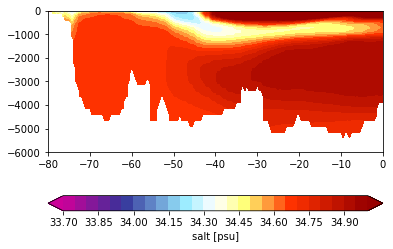

In [35]:
# plot the S section
levels = np.arange(33.7, 35.+0.05, 0.05)
CS = plt.contourf(YY, DEPTH, secS.T, levels = levels, cmap=cmap_correlations256, extend='both', zlev=0); # cm.seismic
cbar=plt.colorbar(CS, orientation = 'horizontal', pad=0.2, label='salt [psu]')
plt.show()

In [36]:
firstyear,lastyear=2000,2019
filetmp = '/work/ab0995/a270046/AWICM3-SO-checks/TCO8/TCO8_MLD1.fesom.{}.nc'
files = [filetmp.format(YYYY) for YYYY in range(firstyear,lastyear+1,1)]
mld1_fl= xr.open_mfdataset(files) 

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [37]:
mld1_field=mld1_fl.variables['MLD1'].min(axis=0)
mld1_field_mean=mld1_fl.variables['MLD1'].mean(axis=0)
mld1_fl.close()

In [38]:
dist,secMLD=pf2.get_transect(data=np.tile(mld1_field,[47,1]).T, mesh=mesh, lonlat=sec)
dist,secMLD_mean=pf2.get_transect(data=np.tile(mld1_field_mean,[47,1]).T, mesh=mesh, lonlat=sec)
secMLD=secMLD[:,0]
secMLD_mean=secMLD_mean[:,0]

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'zlev'
  


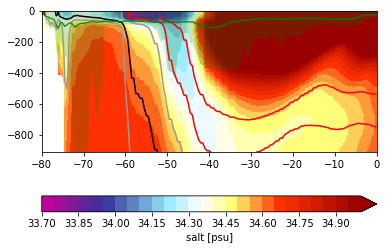

In [39]:
# plot the S section
howmany=25
levels = np.arange(33.7, 35.+0.05, 0.05) # -5 to 5 degrees

YY,DEPTH=np.meshgrid(sec[1,:], mesh.zlev[:howmany])
CS = plt.contourf(YY, DEPTH, secS[:,0:howmany].T, levels = levels, cmap=cmap_correlations256, extend='max', zlev=0); # cm.seismic
cbar=plt.colorbar(CS, orientation = 'horizontal', pad=0.2, label='salt [psu]')
CS2 = plt.contour(YY, DEPTH, sec_sigma2[:,0:howmany].T, levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['r','r','0.6','k','0.6']) # np.array([30.5, 30.8, 31.4, 31.6, 31.8, 32.0, 32.1])highlight some lines

# add mixed layer mean + max
y2=np.squeeze(secMLD)
y1=0.
plt.fill_between(YY[0,:], y1, np.maximum(y2,np.min(mesh.zlev[:howmany])), where=y2 <= y1, facecolor='green', interpolate=True, alpha=0.2)
plt.plot(YY[0,:], secMLD_mean, color='green', alpha=0.8)
plt.show()

In [41]:
!mkdir -p /pf/a/a270046/AWICM3-SO-checks/figures/

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'zlev'
  


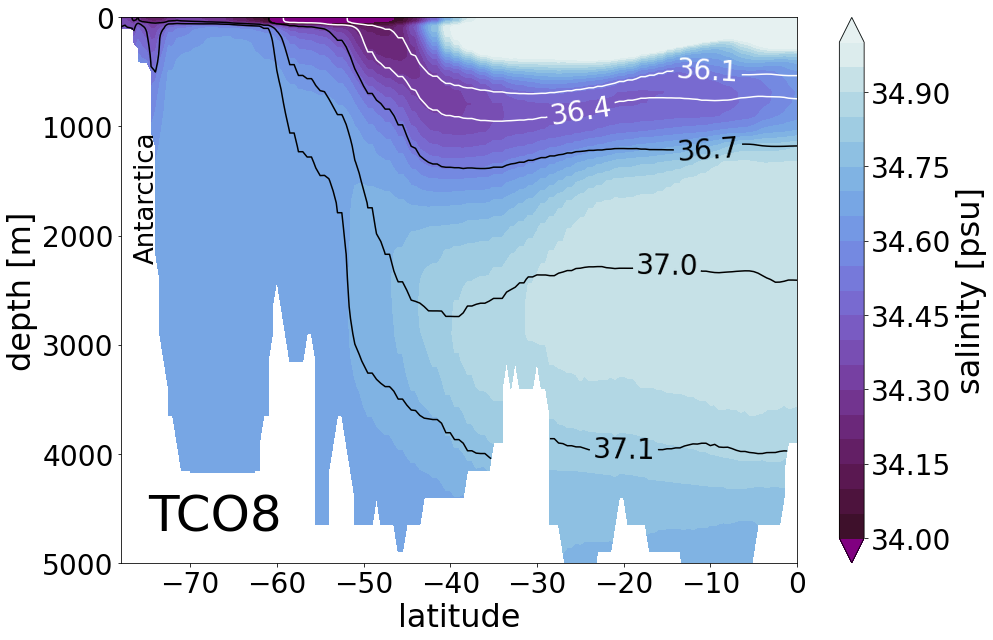

In [47]:
fig=plt.figure(figsize=(14,9))

howmany=45

cmap=cmocean.cm.dense_r
cmap.set_under('purple')

# set sizes
numfontsize=28
texfontsize=32

levels = np.arange(34, 35.+0.05, 0.05) # -1 to 1 psu
YY,DEPTH=np.meshgrid(sec[1,:], -mesh.zlev[:howmany])
CS1 = plt.contourf(YY, DEPTH, secS[:,0:howmany].T, levels = levels, cmap=cmap, extend='both', zlev=0); # cm.seismic

plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, DEPTH, sec_sigma2[:,0:howmany].T, levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 300), (-25, 800), (-10, 1500), (-15, 2500), (-20, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)


plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='salinity [psu]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('TCO8', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/AWICM3-SO-checks/figures/TCO8_salinity.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

In [111]:
!rm /pf/a/a270046/AWICM3-SO-checks/figures/TCO8_potTemp.pdf

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'zlev'
  # This is added back by InteractiveShellApp.init_path()


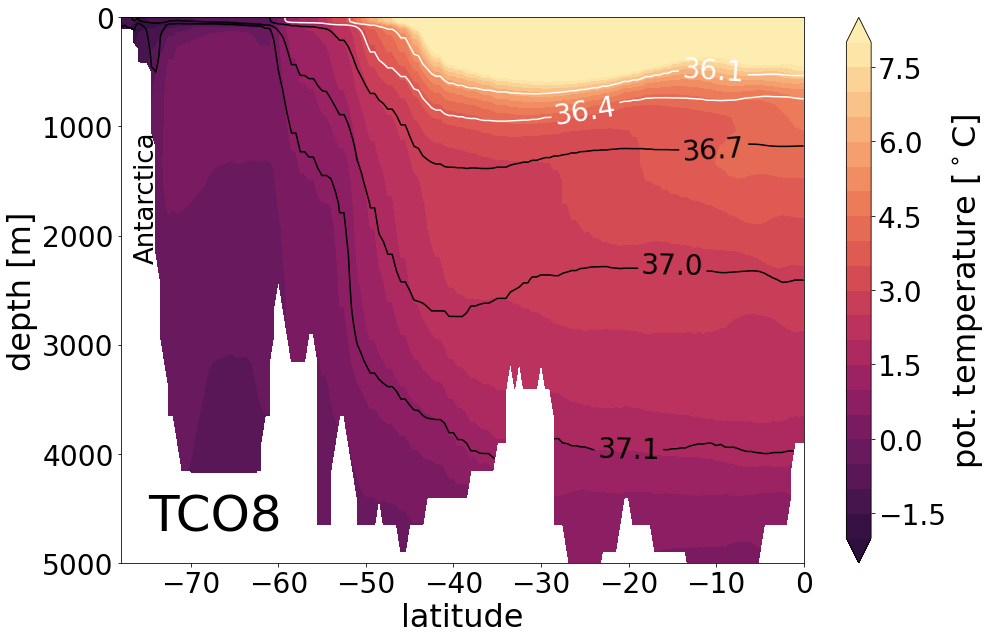

In [113]:
fig=plt.figure(figsize=(14,9))

cmap=cmocean.cm.matter_r

# set sizes
numfontsize=28
texfontsize=32

#YY,CLIMZ=np.meshgrid(yy[:uptolat,0], data['PHC']['clim'].z[0:])
levels = np.arange(-2, 8.+0.5, 0.5) # -5 to 5 degrees
CS1 = plt.contourf(YY, DEPTH, secT[:,0:howmany].T, levels = levels, cmap=cmap, extend='both', zlev=0); # cm.seismic

plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, DEPTH, sec_sigma2[:,0:howmany].T, levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 300), (-25, 800), (-10, 1500), (-15, 2500), (-20, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)


plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='pot. temperature [$^\circ$C]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('TCO8', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/AWICM3-SO-checks/figures/TCO8_potTemp.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

In [55]:
# sea ice

In [57]:
ls /work/ab0995/a270046/AWICM3-SO-checks/TCO8/

a_ice.fesom.2000.nc          TCO8_evap.fesom.2000.nc
a_ice.fesom.2001.nc          TCO8_evap.fesom.2001.nc
a_ice.fesom.2002.nc          TCO8_evap.fesom.2002.nc
a_ice.fesom.2003.nc          TCO8_evap.fesom.2003.nc
a_ice.fesom.2004.nc          TCO8_evap.fesom.2004.nc
a_ice.fesom.2005.nc          TCO8_evap.fesom.2005.nc
a_ice.fesom.2006.nc          TCO8_evap.fesom.2006.nc
a_ice.fesom.2007.nc          TCO8_evap.fesom.2007.nc
a_ice.fesom.2008.nc          TCO8_evap.fesom.2008.nc
a_ice.fesom.2009.nc          TCO8_evap.fesom.2009.nc
a_ice.fesom.2010.nc          TCO8_evap.fesom.2010.nc
a_ice.fesom.2011.nc          TCO8_evap.fesom.2011.nc
a_ice.fesom.2012.nc          TCO8_evap.fesom.2012.nc
a_ice.fesom.2013.nc          TCO8_evap.fesom.2013.nc
a_ice.fesom.2014.nc          TCO8_evap.fesom.2014.nc
a_ice.fesom.2015.nc          TCO8_evap.fesom.2015.nc
a_ice.fesom.2016.nc          TCO8_evap.fesom.2016.nc
a_ice.fesom.2017.nc          TCO8_evap.fesom.2017.nc
a_ice.fesom.2018.nc          TCO8_evap.fesom.2

In [58]:
firstyear,lastyear=2000,2019
filetmp = '/work/ab0995/a270046/AWICM3-SO-checks/TCO8/a_ice.fesom.{}.nc'
files = [filetmp.format(YYYY) for YYYY in range(firstyear,lastyear+1,1)]
area_fl= xr.open_mfdataset(files) 

/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/work/ab0995/a270046/miniconda3-install/envs/natcommunpickle/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [75]:
# September
area_fl.variables['a_ice'][8::12]

<xarray.Variable (time: 20, nod2: 126858)>
dask.array<shape=(20, 126858), dtype=float32, chunksize=(1, 126858)>
Attributes:
    description:  ice concentration
    long_name:    ice concentration
    units:        %

In [76]:
area_field_mean=area_fl.variables['a_ice'][8::12].mean(axis=0)
area_fl.close()

In [77]:
dist,secICE=pf2.get_transect(data=np.tile(area_field_mean,[47,1]).T, mesh=mesh, lonlat=sec)
secICE=secICE[:,0]

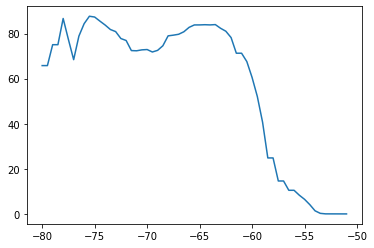

In [106]:
plt.plot(sec[1,:],100.*secICE)
plt.show()

In [102]:
np.shape(secICE)

(161,)

In [103]:
def determine_extent_lat(zz_area, lats):
    
    maxlat=np.nanmax(lats[zz_area[:]>0.15])
    
    xp=[maxlat+1.,maxlat] # maxlat+1. is equal or below 0.15
    fp=[zz_area[lats==maxlat+1].data[0], zz_area[lats==maxlat].data[0]]

    return np.interp(0.15, fp, xp)

In [104]:
extent=determine_extent_lat(secICE, sec[1])

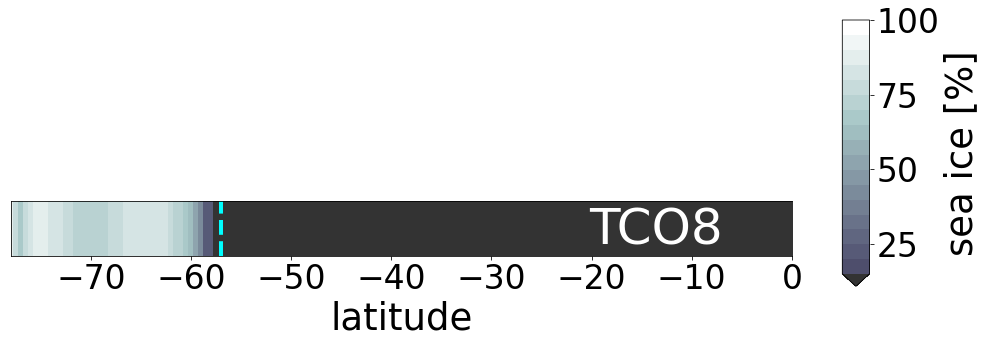

In [109]:
#fig=plt.figure(figsize=(14,1))
fig, ax = plt.subplots(figsize=(14,1))

lvIce = np.linspace(0.35,1.0,17) #12
cmIce = cm.bone(lvIce)
newCmap = mcol.ListedColormap(cmIce)

newCmap.set_under('0.2')

# set sizes
numfontsize=33
texfontsize=37

which='TCO8'

X=sec[1,:]; Z=100.*secICE.filled(fill_value=0.) #100.*secICE

Y=np.arange(0,5)
Yrep=np.matlib.repmat(Y, 161, 1).T

im=plt.pcolor(np.array([X,X,X,X,X]),Yrep, np.array([Z,Z,Z,Z,Z]), cmap=newCmap, vmin=15., vmax=100., shading='nearest')
#im=plt.pcolor(np.array([X,X,X,X,X]),Yrep, np.array([Z,Z,Z,Z,Z]), cmap=newCmap, vmin=0.15, vmax=1.)

#plt.hlines(0.15,-80.,-40., color='w')



#plt.vlines(dataSIE[which]['extents_'+period][lons==-30.5], 0., 4., color='cyan', linewidths=4, linestyle='dashed')
plt.vlines(extent, 0., 4., color='cyan', linewidths=4, linestyle='dashed')


plt.axis([-78., 0., 0., 4.]);

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0);
plt.yticks(fontsize=numfontsize, rotation=0);

plt.xlabel('latitude',fontsize=texfontsize)
ax.set_facecolor('0.2')
ax.axes.yaxis.set_visible(False)
#ax.set_facecolor('k')
#ax.axes.yaxis.set_visible(False)

# annotation
plt.annotate(which, xy=(0.74, 0.22), xycoords='axes fraction', backgroundcolor = 'none', color='w', fontsize=50)

# Now adding the colorbar
cbaxes = fig.add_axes([.95, -.3, 0.027, 3.7]) 
cbar = plt.colorbar(im, orientation = 'vertical', cax = cbaxes, extend='min')  

##cbar_label='pot. temperature [$^\circ$C]'
cbar_label='sea ice [%]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

#plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/AWICM3-SO-checks/figures/TCO8_seaice.pdf')
   pp.savefig(fig,bbox_inches = 'tight',facecolor=fig.get_facecolor(), edgecolor='none')
   pp.close()